# Synthetic Dataset Generation

Importing the required libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Naming the disease

In [73]:
chronic_disease = "Diabetes"

In [57]:
# Setting the range for years
years = np.arange(1901, 2102)

In [58]:
# Assumed Growth Rates and Starting Points
initial_population = 3000000  # Initial population in 1901
population_growth_rate = 0.015  # 1.5% annual growth
chronic_disease_rate = 0.01  # Initial chronic disease rate (1% of the population)
mortality_rate = 0.005  # 0.5% mortality rate
recovery_rate = 0.02  # 2% recovery rate

pollution_start = 20  # Starting AQI in 1901
pollution_increase_rate = 0.1  # AQI increase per year

health_index_start = 100  # Initial health index in 1901
health_index_decline_rate = 0.27  # Health index declines over time

education_index_start = 34  # Initial education index
education_growth_rate = 0.005  # Education index growth per year

income_start = 2000  # Average income in 1901 (in USD)
income_growth_rate = 0.03  # Income growth per year

bmi_start = 22  # Initial average BMI
bmi_increase_rate = 0.02  # BMI increase per year

healthcare_access_start = 50  # Hospitals per 100,000 people
healthcare_access_growth_rate = 0.2  # Growth rate per year

smokers_start = 5000  # Initial smokers per 100,000
smokers_change_rate = -20  # Reduction in smokers per year

alcohol_consumers_start = 3000  # Initial alcohol consumers per 100,000
alcohol_consumers_change_rate = 10  # Increase in alcohol consumers per year

In [59]:
# Creating synthetic data for the years
population = initial_population * (1 + population_growth_rate) ** (years - 1901)
chronic_disease_patients = population * chronic_disease_rate
mortality_count = chronic_disease_patients * mortality_rate
recovery_count = chronic_disease_patients * recovery_rate
pollution = pollution_start + pollution_increase_rate * (years - 1901)
health_index = health_index_start - health_index_decline_rate * (years - 1901)
education_index = education_index_start + education_growth_rate * (years - 1901)
income_level = income_start * (1 + income_growth_rate) ** (years - 1901)
bmi = bmi_start + bmi_increase_rate * (years - 1901)
healthcare_access = healthcare_access_start + healthcare_access_growth_rate * (years - 1901)
smokers = smokers_start + smokers_change_rate * (years - 1901)
alcohol_consumers = alcohol_consumers_start + alcohol_consumers_change_rate * (years - 1901)

In [60]:
# Ensureing that values stay within realistic limits
healthcare_access = np.clip(healthcare_access, 0, None)
smokers = np.clip(smokers, 0, None)
alcohol_consumers = np.clip(alcohol_consumers, 0, None)

In [61]:
# Create the DataFrame
data = pd.DataFrame({
    'Year': years,
    'Population': population.astype(int),
    'Chronic Disease Patient Count': chronic_disease_patients.astype(int),
    'Mortality Rate Count': mortality_count.astype(int),
    'Recovery / Management Count': recovery_count.astype(int),
    'Pollution Level': pollution,
    'Health Index': health_index,
    'Education Index': education_index,
    'Average Income Level': income_level.astype(int),
    'Average BMI': bmi,
    'Healthcare Access Rate': healthcare_access,
    'Average Smokers (per 100,000)': smokers.astype(int),
    'Average Alcohol Consumers (per 100,000)': alcohol_consumers.astype(int)
})

In [62]:
# Save the dataset to a CSV file
data.to_csv("D:\AISSMS-IOIT\General\Hackathons\Techathon\Day1\d1.csv", index=False)

In [63]:
data.head()

,Year,Population,Chronic Disease Patient Count,Mortality Rate Count,Recovery / Management Count,Pollution Level,Health Index,Education Index,Average Income Level,Average BMI,Healthcare Access Rate,"Average Smokers (per 100,000)","Average Alcohol Consumers (per 100,000)"
0,1901,3000000,30000,150,600,20.0,100.00,34.000,2000,22.00,50.0,5000,3000
1,1902,3044999,30449,152,608,20.1,99.73,34.005,2060,22.02,50.2,4980,3010
2,1903,3090674,30906,154,618,20.2,99.46,34.010,2121,22.04,50.4,4960,3020
3,1904,3137035,31370,156,627,20.3,99.19,34.015,2185,22.06,50.6,4940,3030
4,1905,3184090,31840,159,636,20.4,98.92,34.020,2251,22.08,50.8,4920,3040


In [64]:
data.tail()

,Year,Population,Chronic Disease Patient Count,Mortality Rate Count,Recovery / Management Count,Pollution Level,Health Index,Education Index,Average Income Level,Average BMI,Healthcare Access Rate,"Average Smokers (per 100,000)","Average Alcohol Consumers (per 100,000)"
196,2097,55522055,555220,2776,11104,39.6,47.08,34.980,656335,25.92,89.2,1080,4960
197,2098,56354886,563548,2817,11270,39.7,46.81,34.985,676025,25.94,89.4,1060,4970
198,2099,57200209,572002,2860,11440,39.8,46.54,34.990,696306,25.96,89.6,1040,4980
199,2100,58058212,580582,2902,11611,39.9,46.27,34.995,717195,25.98,89.8,1020,4990
200,2101,58929085,589290,2946,11785,40.0,46.00,35.000,738711,26.00,90.0,1000,5000


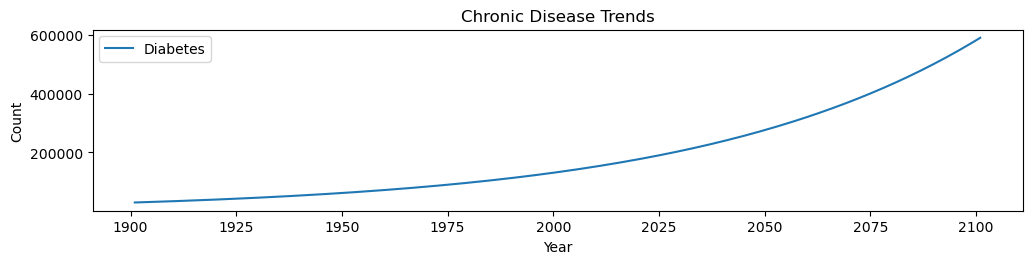

In [74]:
# Plot some of the trends
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(years, data['Chronic Disease Patient Count'], label=chronic_disease)
plt.title('Chronic Disease Trends')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()

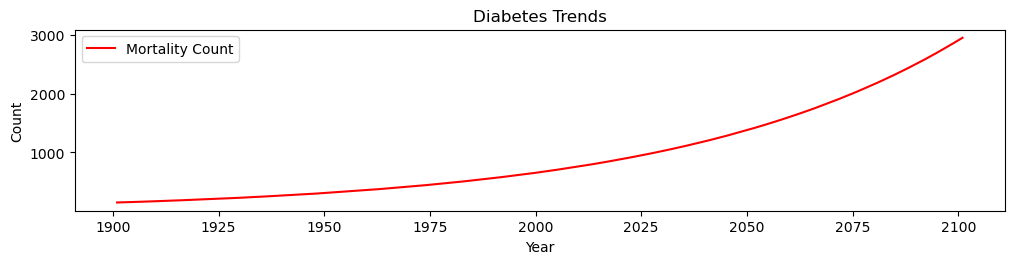

In [75]:
# Plot some of the trends
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(years, data['Mortality Rate Count'], label='Mortality Count', color="r")
plt.title(chronic_disease + ' Trends')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()

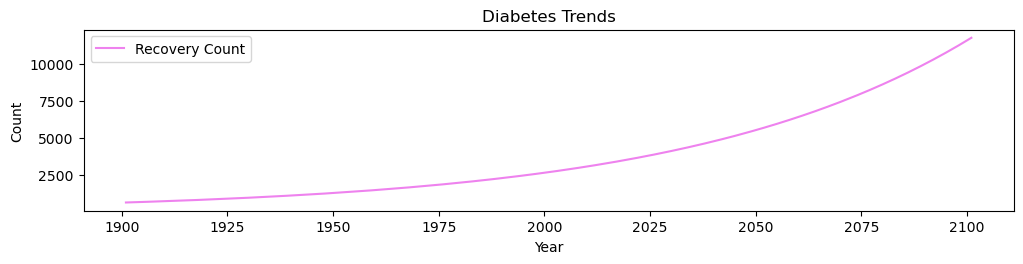

In [77]:
# Plot some of the trends
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(years, data['Recovery / Management Count'], label='Recovery Count', color="violet")
plt.title(chronic_disease + ' Trends')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()

# Terminated